In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.metrics import roc_curve, auc, classification_report,f1_score, roc_auc_score, confusion_matrix
import itertools

In [2]:
df = pd.read_csv('/home/isha/my_projects/bank-additional.csv')

In [3]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


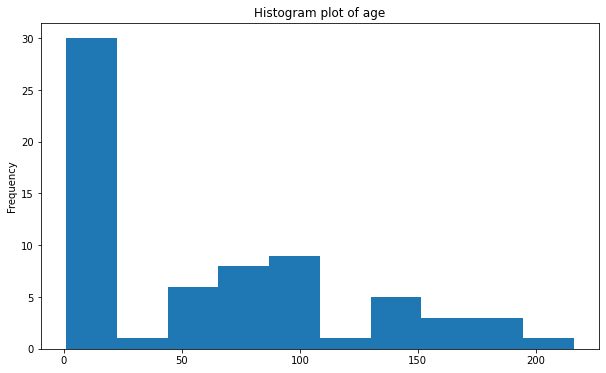

<Figure size 432x288 with 0 Axes>

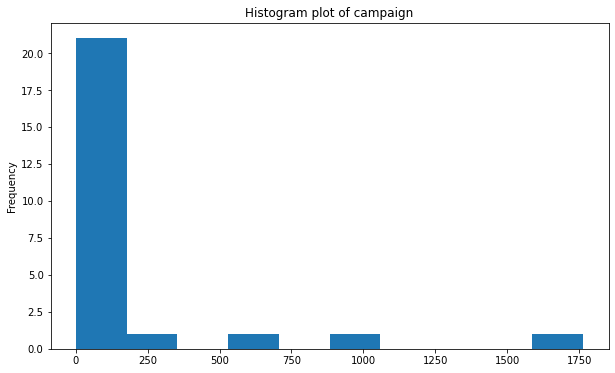

<Figure size 432x288 with 0 Axes>

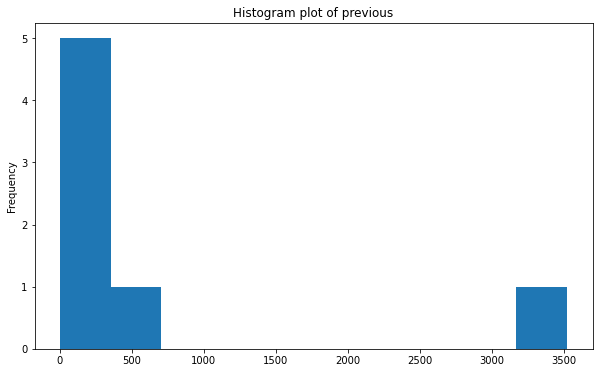

<Figure size 432x288 with 0 Axes>

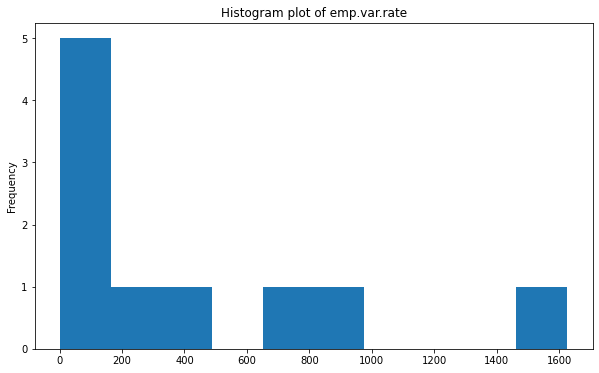

<Figure size 432x288 with 0 Axes>

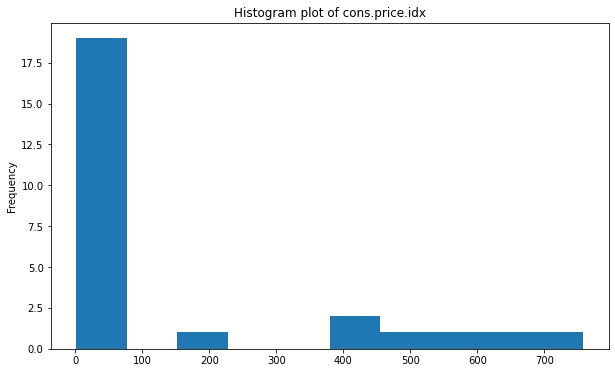

<Figure size 432x288 with 0 Axes>

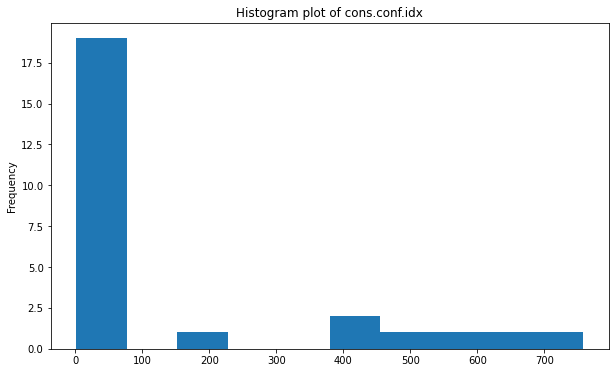

<Figure size 432x288 with 0 Axes>

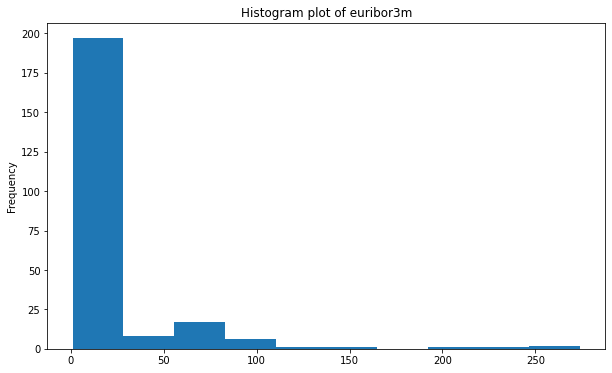

<Figure size 432x288 with 0 Axes>

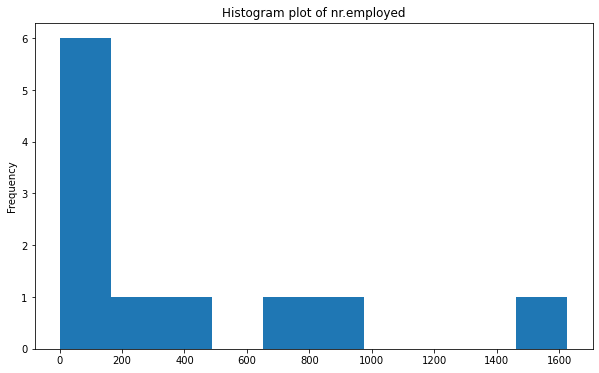

<Figure size 432x288 with 0 Axes>

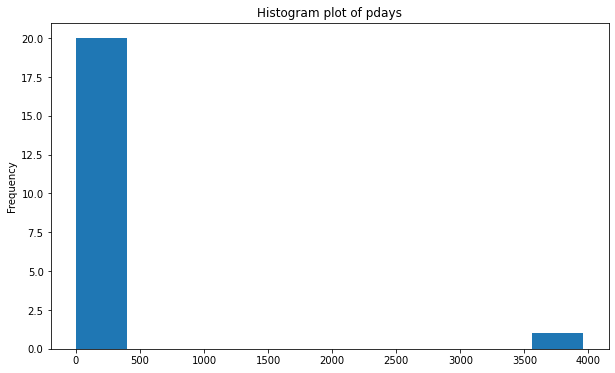

<Figure size 432x288 with 0 Axes>

In [4]:
numerical = ['age','campaign','previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays']
for i in numerical:
    df[i].value_counts().plot(kind='hist',figsize = (10, 6),title='Histogram plot of '+i)
    plt.figure()
    plt.show()

Visualisation of numerical to find out outliers using boxplot

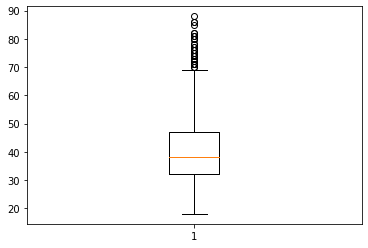

<Figure size 432x288 with 0 Axes>

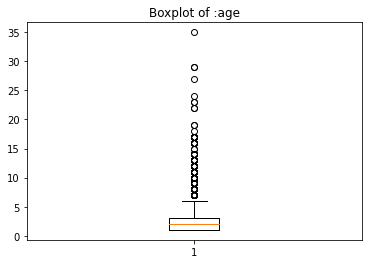

<Figure size 432x288 with 0 Axes>

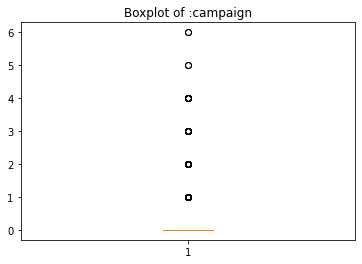

<Figure size 432x288 with 0 Axes>

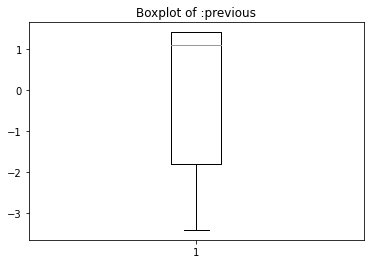

<Figure size 432x288 with 0 Axes>

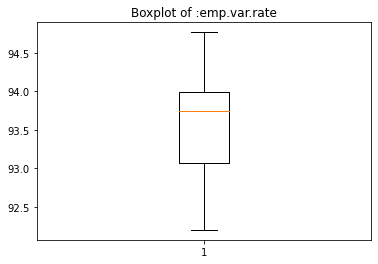

<Figure size 432x288 with 0 Axes>

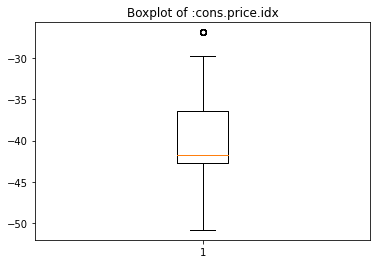

<Figure size 432x288 with 0 Axes>

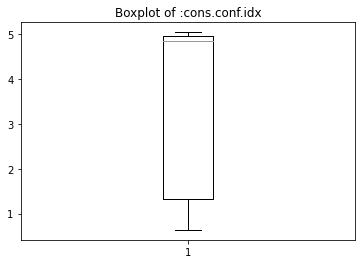

<Figure size 432x288 with 0 Axes>

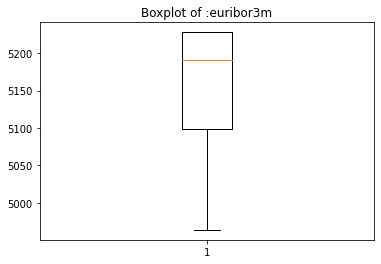

<Figure size 432x288 with 0 Axes>

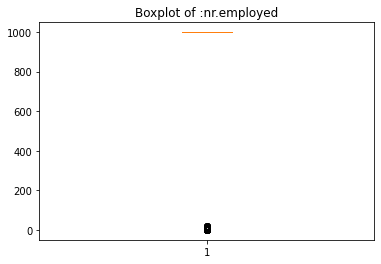

<Figure size 432x288 with 0 Axes>

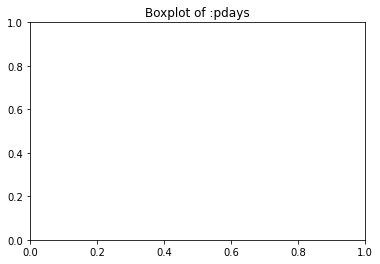

In [5]:
for i in numerical:
    plt.boxplot(df[i])
    plt.figure()
    plt.show()
    plt.title('Boxplot of :' +i)

Dropping 3 features

In [6]:
df = df.drop(labels=['pdays','default'],axis=1)

In [7]:
df = df[df['education'].str.lower() != 'illiterate']

In [8]:
print(df['education'].count())

4118


Removing outliers from age, campaign, cons.conf.idx

In [9]:
df = df[df['age'] < 69]
df = df[df['campaign'] < 20]
df = df[df['cons.conf.idx'] < -29]

In [10]:
print(df.count())

age               4030
job               4030
marital           4030
education         4030
housing           4030
loan              4030
contact           4030
month             4030
day_of_week       4030
campaign          4030
previous          4030
poutcome          4030
emp.var.rate      4030
cons.price.idx    4030
cons.conf.idx     4030
euribor3m         4030
nr.employed       4030
y                 4030
dtype: int64


Label Encoding the features

In [11]:
le = LabelEncoder()
features = ['job','marital','education', 'month', 'day_of_week', 'housing', 'loan']
for i in features:
    df[i] = le.fit_transform(df[i])
df.y.replace(('yes','no'),(1,0),inplace=True)
df.head(5)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,2,0,cellular,6,0,2,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,telephone,6,0,4,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,2,0,telephone,4,4,1,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,1,1,telephone,4,0,3,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,5,2,0,cellular,7,1,1,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


Bifurcating features and labels

In [12]:
y = df['y']
X = df.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Imputing mode value in 5 categorical features for train and test data

In [13]:
imp = SimpleImputer(missing_values = 12, strategy="most_frequent", copy=False)
imp.fit_transform(X_train['job'].values.reshape(-1,1))
imp = SimpleImputer(missing_values = 12, strategy="most_frequent", copy=False)
imp.fit_transform(X_test['job'].values.reshape(-1,1))

imp = SimpleImputer(missing_values = 4, strategy="most_frequent", copy=False)
imp.fit_transform(X_train['marital'].values.reshape(-1,1))
imp = SimpleImputer(missing_values = 4, strategy="most_frequent", copy=False)
imp.fit_transform(X_test['marital'].values.reshape(-1,1))

imp = SimpleImputer(missing_values = 8, strategy="most_frequent", copy=False)
imp.fit_transform(X_train['education'].values.reshape(-1,1))
imp = SimpleImputer(missing_values = 8, strategy="most_frequent", copy=False)
imp.fit_transform(X_test['education'].values.reshape(-1,1))

imp = SimpleImputer(missing_values = 2, strategy="most_frequent", copy=False)
imp.fit_transform(X_train['housing'].values.reshape(-1,1))
imp = SimpleImputer(missing_values = 2, strategy="most_frequent", copy=False)
imp.fit_transform(X_test['housing'].values.reshape(-1,1))

imp = SimpleImputer(missing_values = 2, strategy="most_frequent", copy=False)
imp.fit_transform(X_train['loan'].values.reshape(-1,1))
imp = SimpleImputer(missing_values = 2, strategy="most_frequent", copy=False)
imp.fit_transform(X_test['loan'].values.reshape(-1,1))

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Replacing missing data by one hot encoding

In [14]:
one_hot_1=pd.get_dummies(df['job'],prefix='job')
X_train = X_train.join(one_hot_1)
X_train = X_train.drop('job', axis=1)

one_hot_test_1=pd.get_dummies(df['job'],prefix='job')
X_test=X_test.join(one_hot_test_1)
X_test=X_test.drop('job',axis=1)

one_hot_2=pd.get_dummies(df['marital'],prefix='marital')
X_train=X_train.join(one_hot_2)
X_train=X_train.drop('marital',axis=1)

one_hot_test_2=pd.get_dummies(df['marital'],prefix='marital')
X_test=X_test.join(one_hot_test_2)
X_test=X_test.drop('marital',axis=1)

one_hot_3=pd.get_dummies(df['education'],prefix='education')
X_train=X_train.join(one_hot_3)
X_train=X_train.drop('education',axis=1)

one_hot_test_3=pd.get_dummies(df['education'],prefix='education')
X_test=X_test.join(one_hot_test_3)
X_test=X_test.drop('education',axis=1)

one_hot_4=pd.get_dummies(df['housing'],prefix='housing')
X_train=X_train.join(one_hot_4)
X_train=X_train.drop('housing',axis=1)

one_hot_test_4=pd.get_dummies(df['housing'],prefix='housing')
X_test=X_test.join(one_hot_test_4)
X_test=X_test.drop('housing',axis=1)

one_hot_5=pd.get_dummies(df['loan'],prefix='loan')
X_train=X_train.join(one_hot_5)
X_train=X_train.drop('loan',axis=1)

one_hot_test_5=pd.get_dummies(df['loan'],prefix='loan')
X_test=X_test.join(one_hot_test_5)
X_test=X_test.drop('loan',axis=1)

one_hot_7=pd.get_dummies(df['poutcome'])
X_train=X_train.join(one_hot_7)
X_train=X_train.drop('poutcome',axis=1)

one_hot_test_7=pd.get_dummies(df['poutcome'],prefix='poutcome')
X_test=X_test.join(one_hot_test_7)
X_test=X_test.drop('poutcome',axis=1)

one_hot_8=pd.get_dummies(df['contact'])
X_train=X_train.join(one_hot_8)
X_train=X_train.drop('contact',axis=1)

one_hot_test_8=pd.get_dummies(df['contact'],prefix='contact')
X_test=X_test.join(one_hot_test_8)
X_test=X_test.drop('contact',axis=1)

Smote Analysis for oversampling data

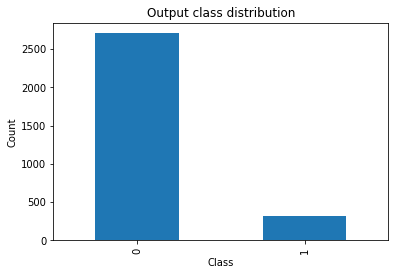

In [15]:
y_train.value_counts().plot(kind='bar', title='Output class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [16]:
smote = SMOTE(random_state=0)
X_train_res, y_train_res = smote.fit_sample(X_train, y_train)

Standardization of data

In [17]:
scalar = MinMaxScaler()
scalar.fit(X_train_res)
X_train = scalar.transform(X_train_res)
X_test = scalar.transform(X_test)

Principal Component Analysis to reduce dimensionality

In [18]:
#pca = PCA(n_components = 13)
#X_train=pca.fit_transform(X_train)
#pca = PCA(n_components = 13)
#X_test=pca.fit_transform(X_test)

Training on different classifiers

In [19]:
def classifier(name, obj, params, x_train, y_train, x_test, y_test):
    CV_rf = GridSearchCV(estimator=obj, param_grid=params, cv=5)
    CV_rf.fit(x_train, y_train)
    
    y_pred_train = CV_rf.predict(x_train)
    y_pred_test = CV_rf.predict(x_test)
    
    print(' ')
    print('---------'+name+' Classifier--------')
    
    #Accuracy score
    print(name+" Train Accuracy: {0:.3f}".format(float((y_pred_train==y_train).sum())/float(len(y_train))))
    print(name+" Test Accuracy: {0:.3f}".format(float((y_pred_test==y_test).sum())/float(len(y_test))))
    
    #Classification Report
    print(name+" Classification Report: ")
    print(classification_report(y_test, y_pred_test))
    
    #F1-Score
    print(name+" Training F1 Score: {0:.3f}".format(f1_score(y_train, y_pred_train, average='weighted')))
    print(name+" Testing F1 Score: {0:.3f}".format(f1_score(y_test, y_pred_test, average='weighted')))
    
    #AUC score
    AUC_score_train=roc_auc_score(y_train, y_pred_train)
    AUC_score_test=roc_auc_score(y_test, y_pred_test)
    print(name+" Training AUC Score: {0:.3f}".format(AUC_score_train))
    print(name+" Testing AUC Score: {0:.3f}".format(AUC_score_test))
    
   
    #Confusion Matrix for test data
    conf = confusion_matrix(y_test,y_pred_test).ravel()
    plt.figure()
    plt.title(name+' :Confusion Matrix')
    conf=np.reshape(conf,(2,2))
    plt.imshow(conf, cmap=plt.cm.Blues, interpolation='nearest')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Predicted No','Predicted Yes'])
    plt.yticks(tick_marks, ['Actual No','Actual Yes'], rotation='vertical')
    thresh = conf.max() / 2.
    for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
        plt.text(j, i, conf[i, j],horizontalalignment="center",color="white" if conf[i, j] > thresh else "black")
    plt.show()

    #Visualize ROC-Curve for test data
    fpr, tpr, threshold = roc_curve(y_test, y_pred_test)
    plt.figure()
    plt.plot(fpr,tpr,label="data 1, auc="+str(AUC_score_test)) 
    plt.xlabel('False Positive Rate (fpr)')
    plt.ylabel('True Positive Rate (tpr)')
    plt.title('Receiver operating characteristics (ROC): '+name)
    plt.legend(loc=4)
    plt.show()
    

 
---------Random Forest Classifier--------
Random Forest Train Accuracy: 0.999
Random Forest Test Accuracy: 0.894
Random Forest Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       908
           1       0.45      0.31      0.37       100

    accuracy                           0.89      1008
   macro avg       0.69      0.63      0.65      1008
weighted avg       0.88      0.89      0.89      1008

Random Forest Training F1 Score: 0.999
Random Forest Testing F1 Score: 0.885
Random Forest Training AUC Score: 0.999
Random Forest Testing AUC Score: 0.634


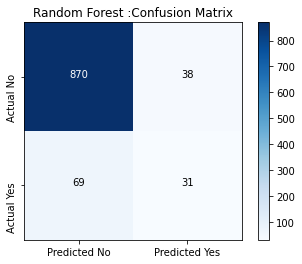

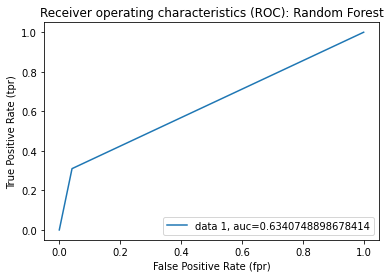

In [24]:
#classifiers=["Random Forest", "SVM", "K Nearest Neighbors", "Naive Bayes"]
# Random Forest

rf = RandomForestClassifier()
params_grid = {
    'n_estimators': range(1, 30),
    'max_features': ['auto', 'sqrt', 'log2'],
    }
classifier('Random Forest', rf, params_grid, X_train, y_train_res, X_test, y_test)

In [21]:
svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
#classifier('SVM',svc,param_grid,X_train,y_train_res,X_test,y_test)

In [22]:
kn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': 5,
    }
#classifier('K Nearest Neighbors',kn,param_grid,X_train,y_train_res,X_test,y_test)

In [23]:
naive_bayes = GaussianNB()
#classifier('Naive Bayes',naive_bayes,{},X_train,y_train_res,X_test,y_test)